In [ ]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read_excel("YouthDataClean.xlsx")

In [ ]:
# Obesity dataset
obesity_df <- df %>%
  filter(grepl("obesity", Question, ignore.case = TRUE)) %>%
  select(YearStart, Race_Ethnicity, Obesity = Percent)

# Soda consumption dataset
soda_df <- df %>%
  filter(grepl("soda", Question, ignore.case = TRUE)) %>%
  select(YearStart, Race_Ethnicity, Soda = Percent)

# Physical activity dataset
activity_df <- df %>%
  filter(grepl("physical activity", Question, ignore.case = TRUE)) %>%
  select(YearStart, Race_Ethnicity, PhysicalActivity = Percent)


In [ ]:
# First join obesity and soda
merged_df <- inner_join(obesity_df, soda_df, by = c("YearStart", "Race_Ethnicity"))

# Then add physical activity
merged_df <- inner_join(merged_df, activity_df, by = c("YearStart", "Race_Ethnicity"))

# View result
head(merged_df)


YearStart,Race_Ethnicity,Obesity,Soda,PhysicalActivity
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2021,Hispanic,20.2,14.0,18.9
2021,Non-Hispanic Black,21.2,15.1,19.7
2021,Non-Hispanic White,13.7,15.8,27.7
2021,2 or more races,18.5,12.5,21.3
2021,Hawaiian/Pacific Islander,28.5,18.2,23.2
2021,Asian,7.7,5.4,19.4


In [ ]:
summary(merged_df)


   YearStart    Race_Ethnicity        Obesity           Soda      
 Min.   :2011   Length:42          Min.   : 5.50   Min.   : 4.60  
 1st Qu.:2013   Class :character   1st Qu.:12.18   1st Qu.:15.15  
 Median :2016   Mode  :character   Median :15.65   Median :19.70  
 Mean   :2016                      Mean   :15.51   Mean   :19.76  
 3rd Qu.:2019                      3rd Qu.:18.27   3rd Qu.:23.90  
 Max.   :2021                      Max.   :29.40   Max.   :35.80  
                                   NA's   :2       NA's   :3      
 PhysicalActivity
 Min.   :15.30   
 1st Qu.:21.45   
 Median :26.15   
 Mean   :25.68   
 3rd Qu.:28.23   
 Max.   :40.00   
 NA's   :2       

In [ ]:
merged_df %>%
  group_by(Race_Ethnicity) %>%
  summarise(
    Mean_Obesity = mean(Obesity, na.rm = TRUE),
    Mean_Soda = mean(Soda, na.rm = TRUE),
    Mean_PhysicalActivity = mean(PhysicalActivity, na.rm = TRUE)
  )


Race_Ethnicity,Mean_Obesity,Mean_Soda,Mean_PhysicalActivity
<chr>,<dbl>,<dbl>,<dbl>
2 or more races,16.350000,19.283333,26.86667
American Indian/Alaska Native,17.366667,29.260000,32.93333
Asian,7.166667,9.233333,18.43333
Hawaiian/Pacific Islander,21.025000,18.125000,26.47500
Hispanic,17.216667,19.733333,23.70000
Non-Hispanic Black,18.533333,22.400000,23.63333
Non-Hispanic White,12.716667,21.350000,28.00000


In [ ]:
merged_df %>%
  group_by(YearStart) %>%
  summarise(
    Mean_Obesity = mean(Obesity, na.rm = TRUE),
    Mean_Soda = mean(Soda, na.rm = TRUE),
    Mean_PhysicalActivity = mean(PhysicalActivity, na.rm = TRUE)
  )


YearStart,Mean_Obesity,Mean_Soda,Mean_PhysicalActivity
<dbl>,<dbl>,<dbl>,<dbl>
2011,15.15714,26.31429,27.32857
2013,11.62857,24.64286,26.72857
2015,14.08333,19.80000,27.31667
2017,16.02857,17.90000,26.27143
2019,16.13333,13.24000,21.81667
2021,19.88571,14.82857,24.31429


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


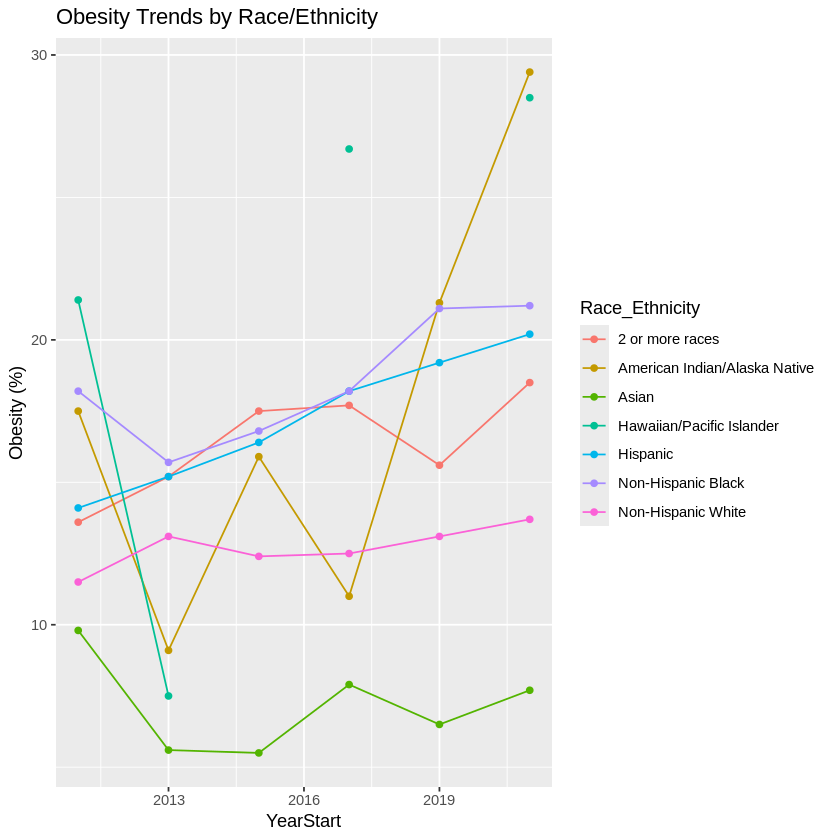

In [ ]:
library(ggplot2)

ggplot(merged_df, aes(x = YearStart, y = Obesity, color = Race_Ethnicity)) +
  geom_line() +
  geom_point() +
  labs(title = "Obesity Trends by Race/Ethnicity", y = "Obesity (%)")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


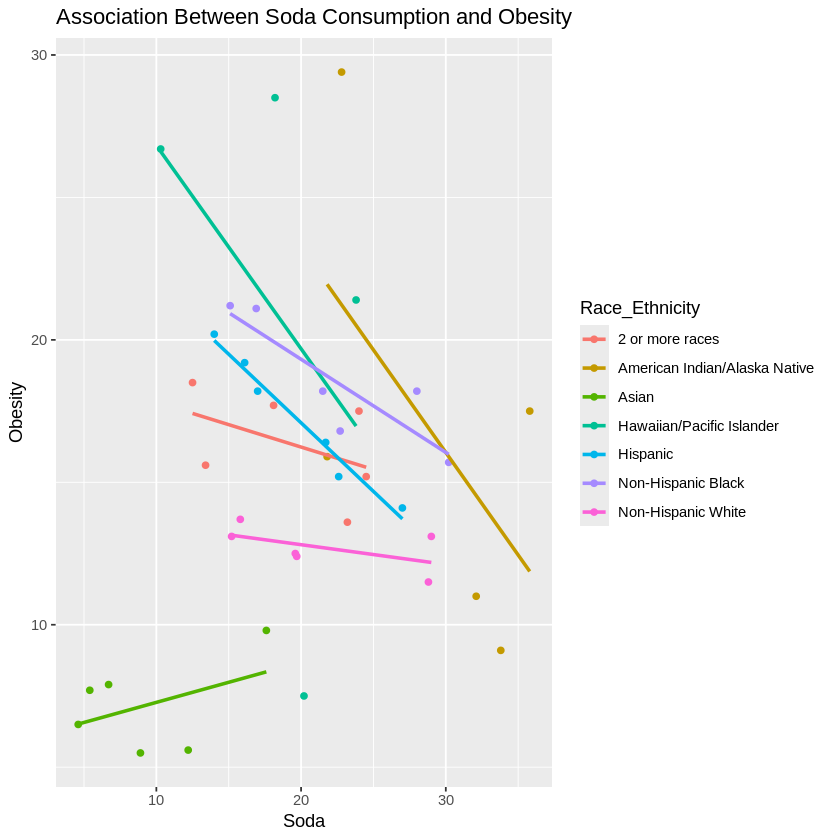

In [ ]:
ggplot(merged_df, aes(x = Soda, y = Obesity, color = Race_Ethnicity)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Association Between Soda Consumption and Obesity")


In [ ]:
merged_df %>%
  select(Obesity, Soda, PhysicalActivity) %>%
  cor(use = "complete.obs")


,Obesity,Soda,PhysicalActivity
Obesity,1.0000000,0.1401231,0.2803284
Soda,0.1401231,1.0000000,0.6554908
PhysicalActivity,0.2803284,0.6554908,1.0000000


In [ ]:
install.packages("ggcorrplot")
library(ggcorrplot)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




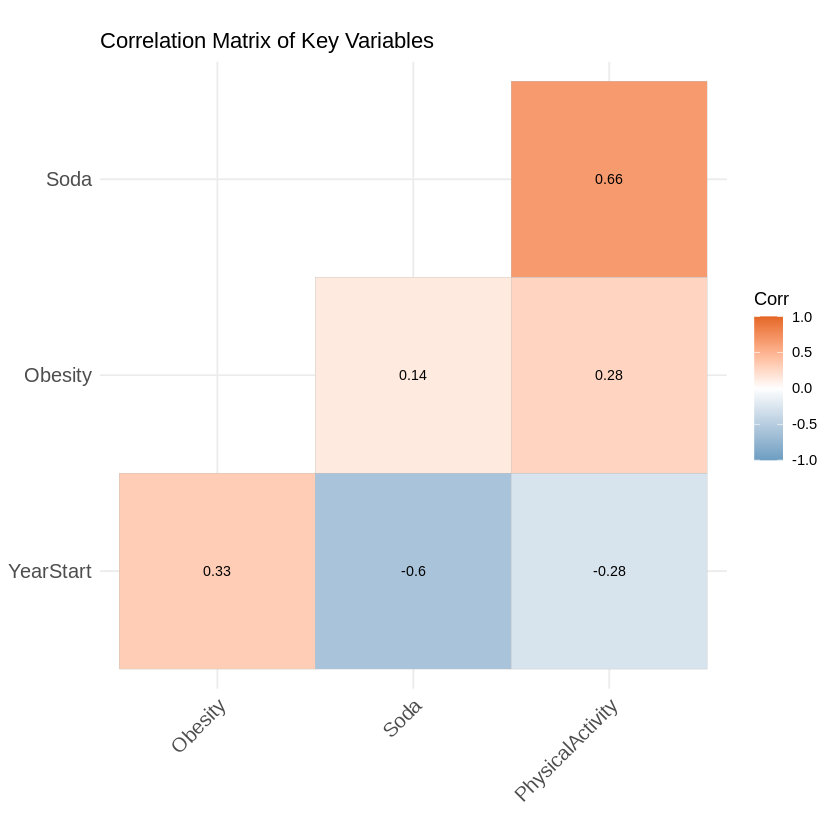

In [ ]:
# Select only numeric columns
numeric_vars <- merged_df %>%
  select_if(is.numeric)

# Calculate correlation matrix
cor_matrix <- cor(numeric_vars, use = "complete.obs")

# Create heatmap
ggcorrplot(cor_matrix,
           method = "square",
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           colors = c("#6D9EC1", "white", "#E46726"),
           title = "Correlation Matrix of Key Variables",
           ggtheme = theme_minimal())


In [ ]:
# Calculate correlation
cor_matrix <- cor(numeric_vars, use = "complete.obs")

# Rename for display
colnames(cor_matrix) <- c("Obesity Prevalence", "Soda Intake", "Physical Activity", "Year")
rownames(cor_matrix) <- colnames(cor_matrix)


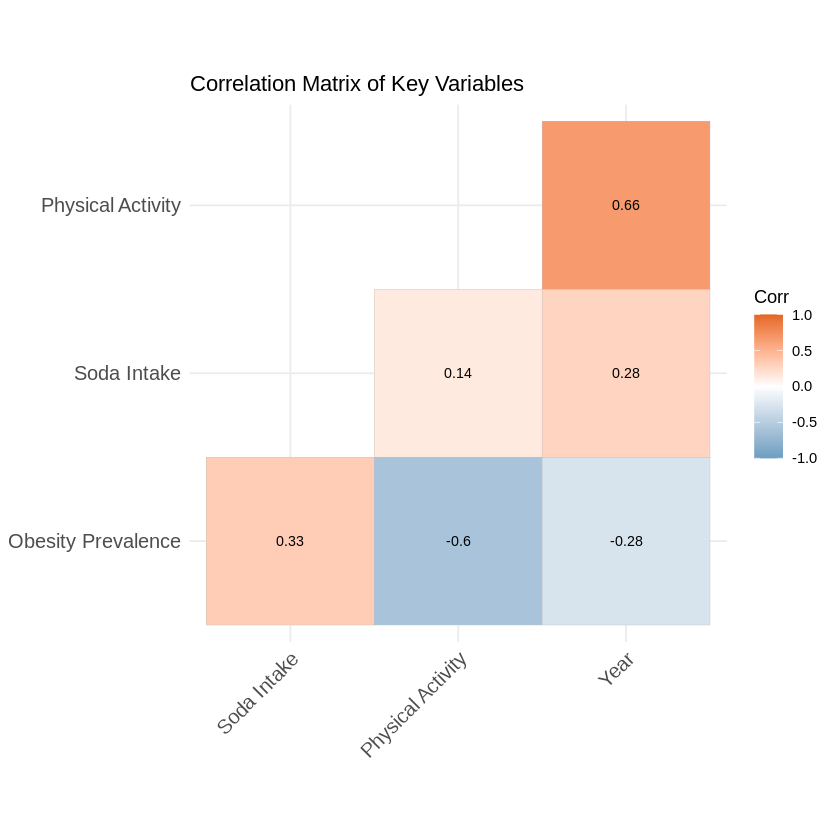

In [ ]:
ggcorrplot(cor_matrix,
           method = "square",
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           colors = c("#6D9EC1", "white", "#E46726"),
           title = "Correlation Matrix of Key Variables",
           ggtheme = theme_minimal())


In [ ]:
install.packages("car")  # only if not installed
library(car)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



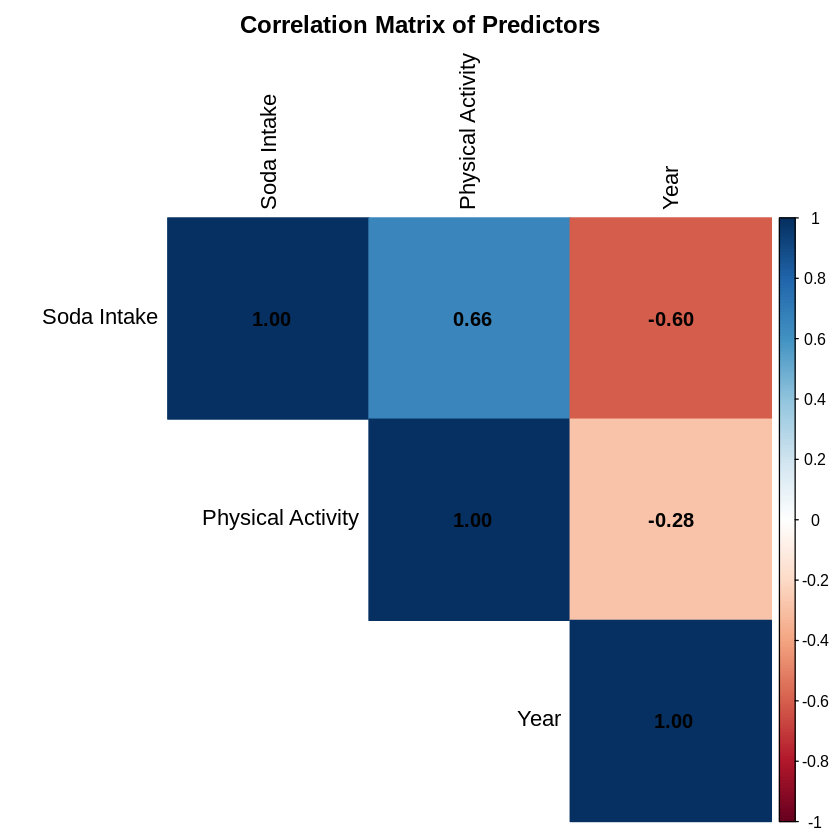

In [ ]:
install.packages("corrplot")  # Install the corrplot package
library(corrplot)            # Load the corrplot package

# Step 1: Create a renamed version of your numeric dataset
num_vars <- merged_df[, c("Soda", "PhysicalActivity", "YearStart")]
colnames(num_vars) <- c("Soda Intake", "Physical Activity", "Year")

# Step 2: Compute correlation matrix
cor_matrix <- cor(num_vars, use = "complete.obs")

# Step 3: Create heatmap with customization
corrplot(cor_matrix,
         method = "color",
         type = "upper",
         addCoef.col = "black",      # color of correlation coefficient text
         tl.col = "black",            # font color for variable labels
         tl.cex = 1.1,               # font size

         title = "Correlation Matrix of Predictors",
         mar = c(0, 0, 2, 0))        # margin to fit title

In [ ]:
model <- lm(Obesity ~ Soda + PhysicalActivity + Race_Ethnicity + YearStart, data = merged_df)
summary(model)



Call:
lm(formula = Obesity ~ Soda + PhysicalActivity + Race_Ethnicity + 
    YearStart, data = merged_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0171  -0.9908  -0.0543   1.2529   6.5536 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                 -1695.6469   738.7712  -2.295
Soda                                            0.1012     0.2322   0.436
PhysicalActivity                                0.3804     0.2314   1.644
Race_EthnicityAmerican Indian/Alaska Native    -3.0714     3.6980  -0.831
Race_EthnicityAsian                            -4.9577     3.9301  -1.261
Race_EthnicityHawaiian/Pacific Islander         5.3629     2.4957   2.149
Race_EthnicityHispanic                          2.0257     2.3098   0.877
Race_EthnicityNon-Hispanic Black                3.0978     2.3937   1.294
Race_EthnicityNon-Hispanic White               -4.2737     2.2689  -1.884
YearStart                         

In [ ]:
vif(model)

,GVIF,Df,GVIF^(1/(2*Df))
Soda,8.231778,1,2.869107
PhysicalActivity,4.138033,1,2.034216
Race_Ethnicity,11.670738,6,1.227227
YearStart,4.305160,1,2.074888


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


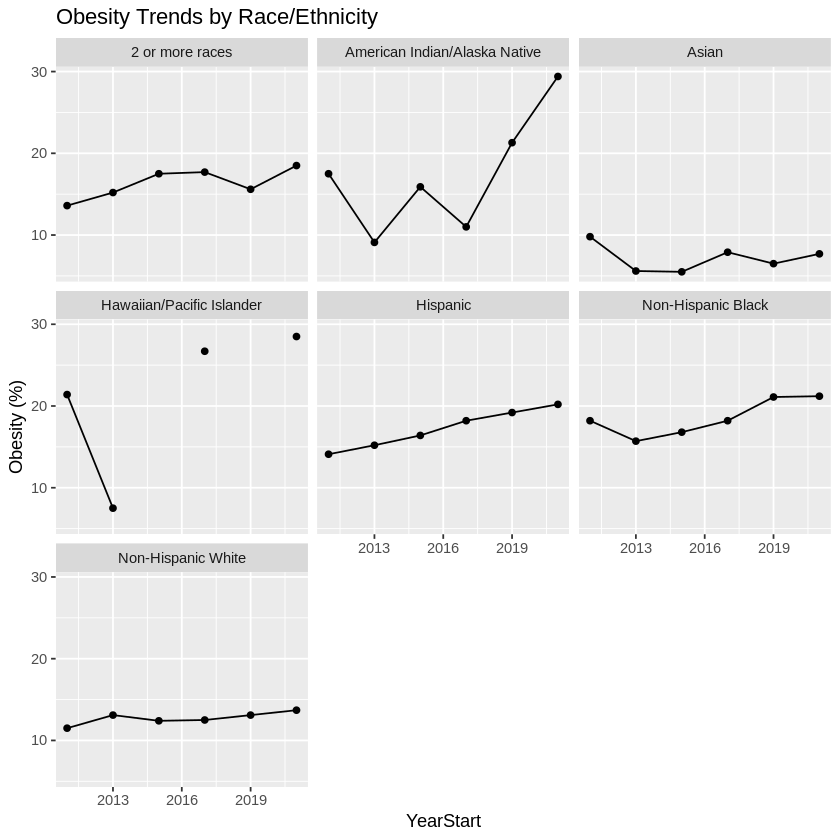

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Obesity)) +
  geom_line() +
  geom_point() +
  facet_wrap(~Race_Ethnicity) +
  labs(title = "Obesity Trends by Race/Ethnicity", y = "Obesity (%)")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


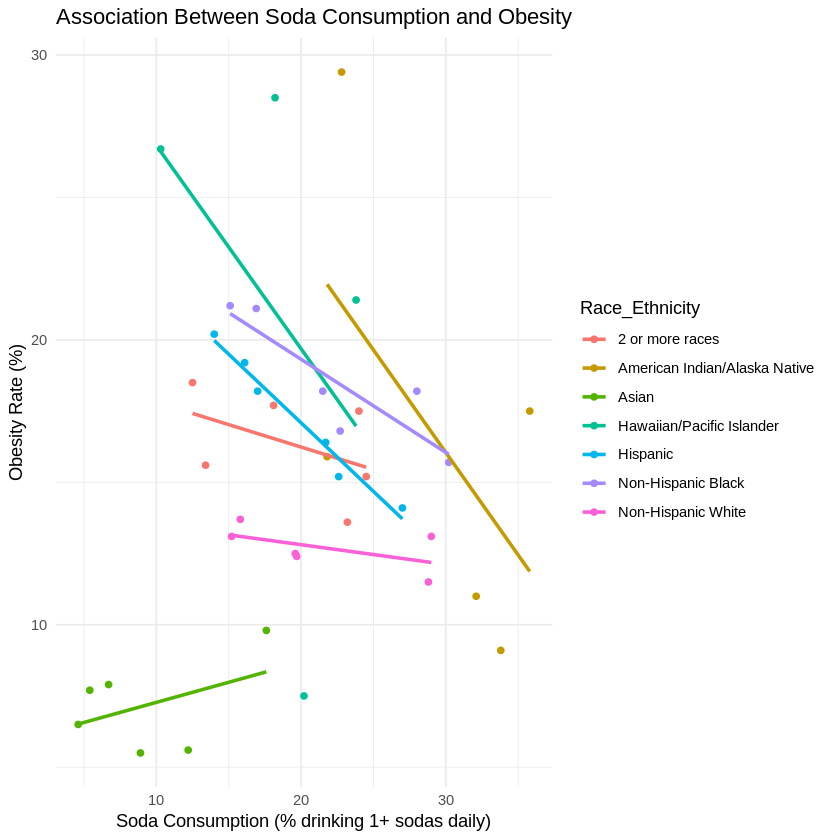

In [ ]:
ggplot(merged_df, aes(x = Soda, y = Obesity, color = Race_Ethnicity)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Association Between Soda Consumption and Obesity",
    x = "Soda Consumption (% drinking 1+ sodas daily)",
    y = "Obesity Rate (%)"
  ) +
  theme_minimal()


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


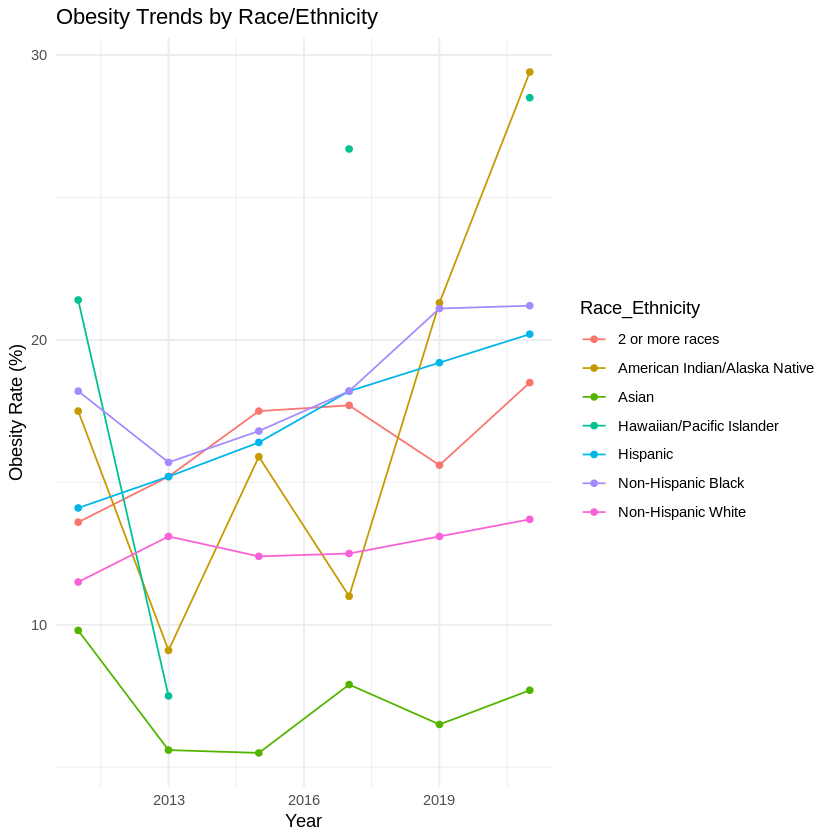

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Obesity, color = Race_Ethnicity)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Obesity Trends by Race/Ethnicity",
    x = "Year",
    y = "Obesity Rate (%)"
  ) +
  theme_minimal()


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


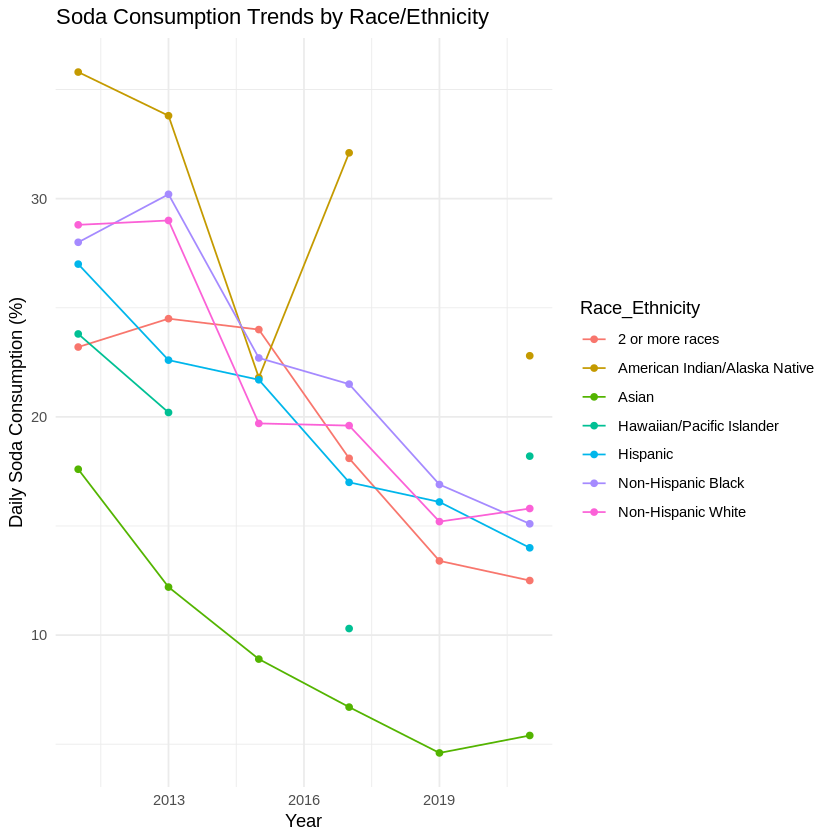

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Soda, color = Race_Ethnicity)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Soda Consumption Trends by Race/Ethnicity",
    x = "Year",
    y = "Daily Soda Consumption (%)"
  ) +
  theme_minimal()


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


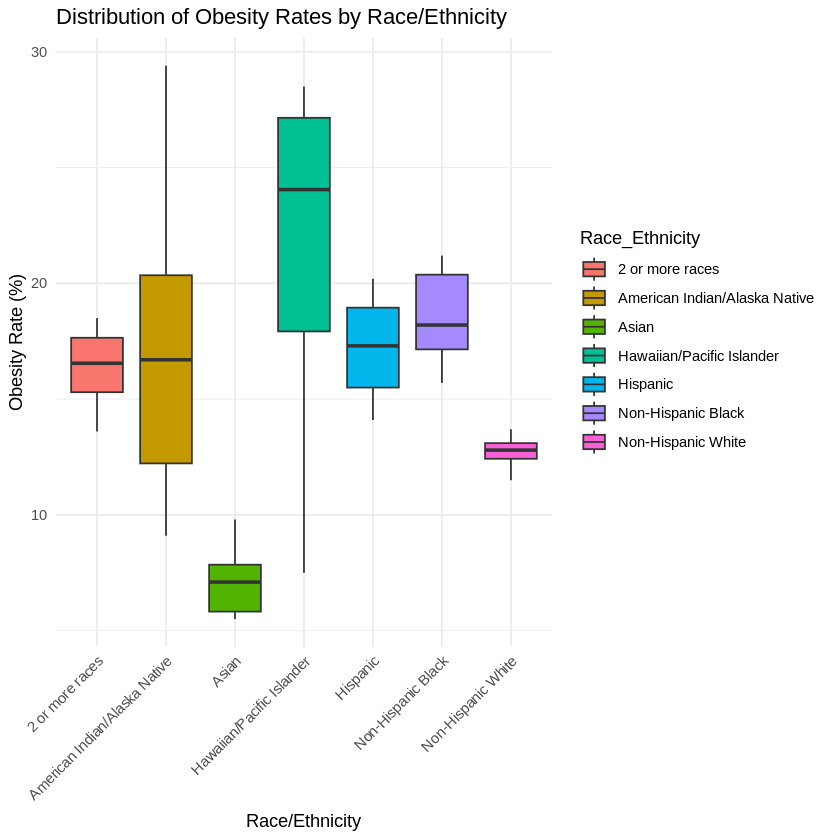

In [ ]:
ggplot(merged_df, aes(x = Race_Ethnicity, y = Obesity, fill = Race_Ethnicity)) +
  geom_boxplot() +
  labs(
    title = "Distribution of Obesity Rates by Race/Ethnicity",
    x = "Race/Ethnicity",
    y = "Obesity Rate (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


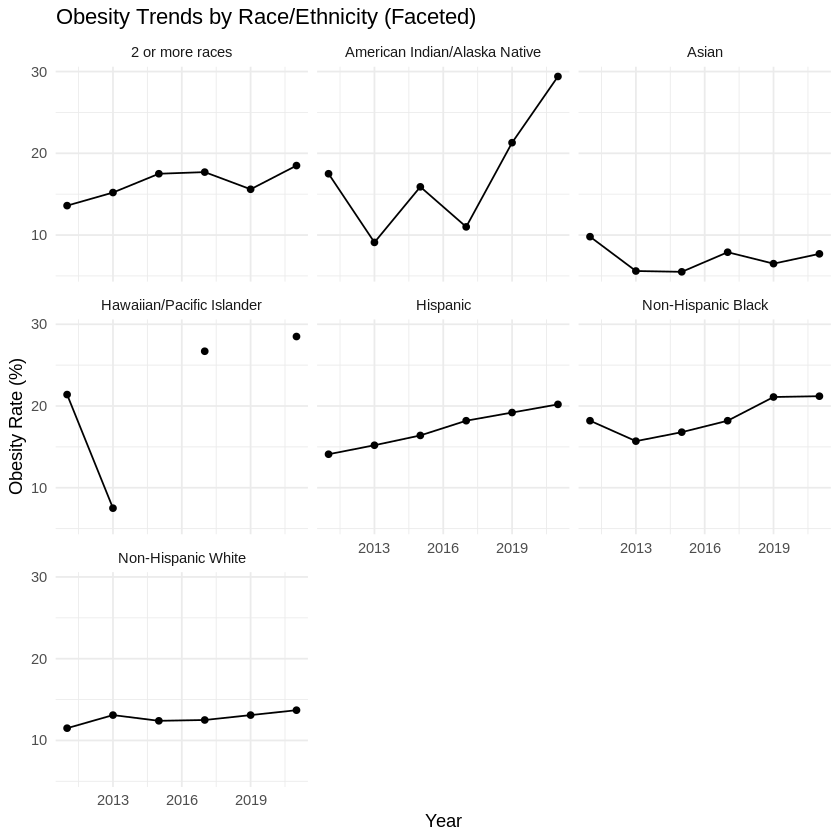

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Obesity)) +
  geom_line() +
  geom_point() +
  facet_wrap(~ Race_Ethnicity) +
  labs(
    title = "Obesity Trends by Race/Ethnicity (Faceted)",
    x = "Year",
    y = "Obesity Rate (%)"
  ) +
  theme_minimal()


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


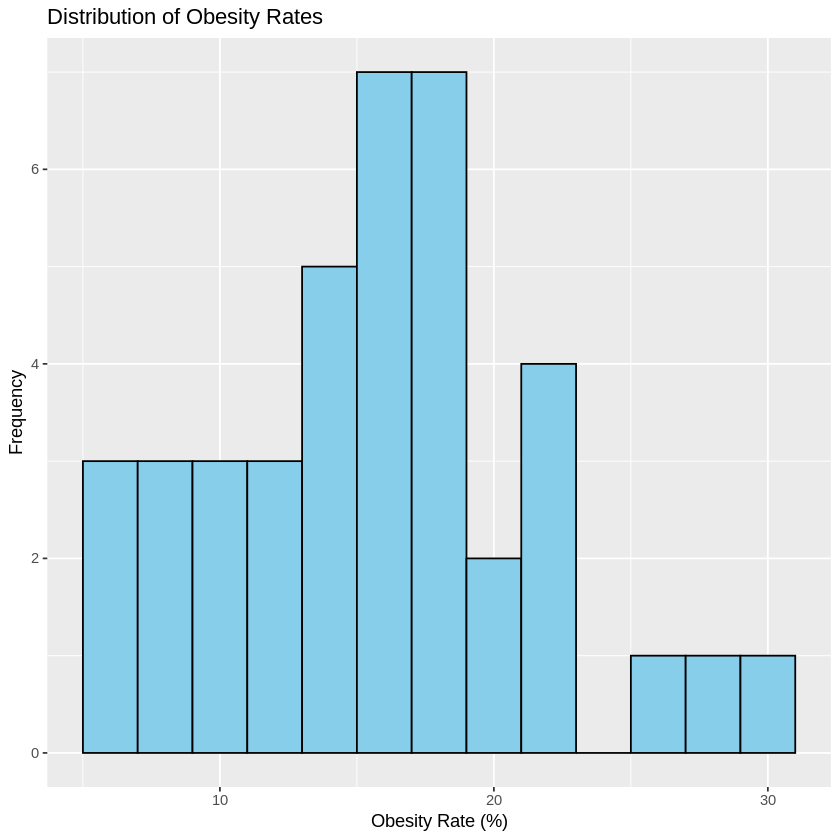

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


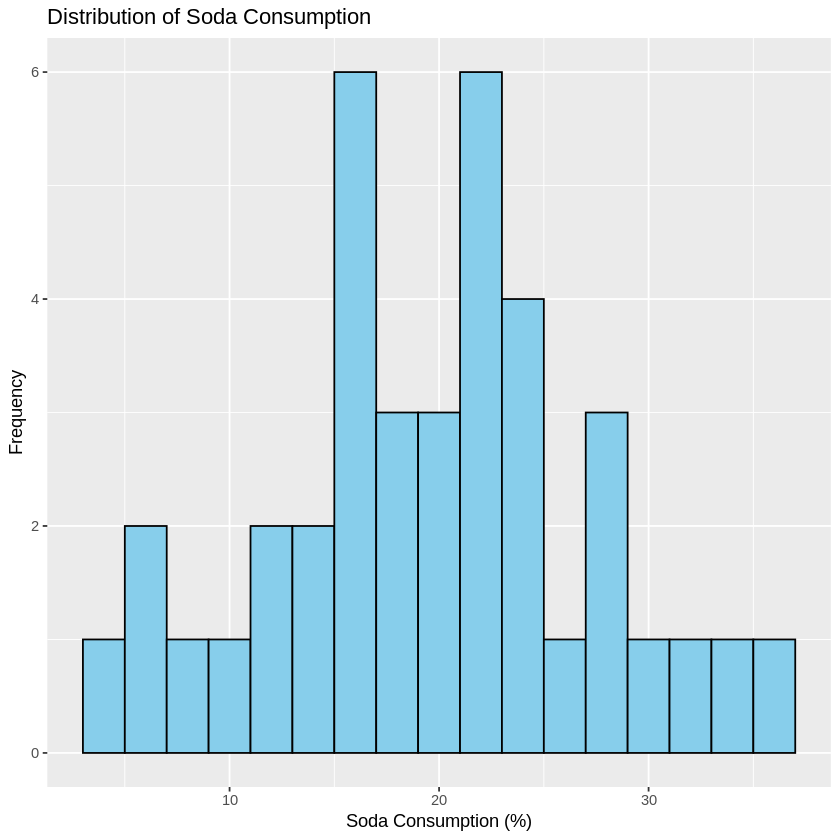

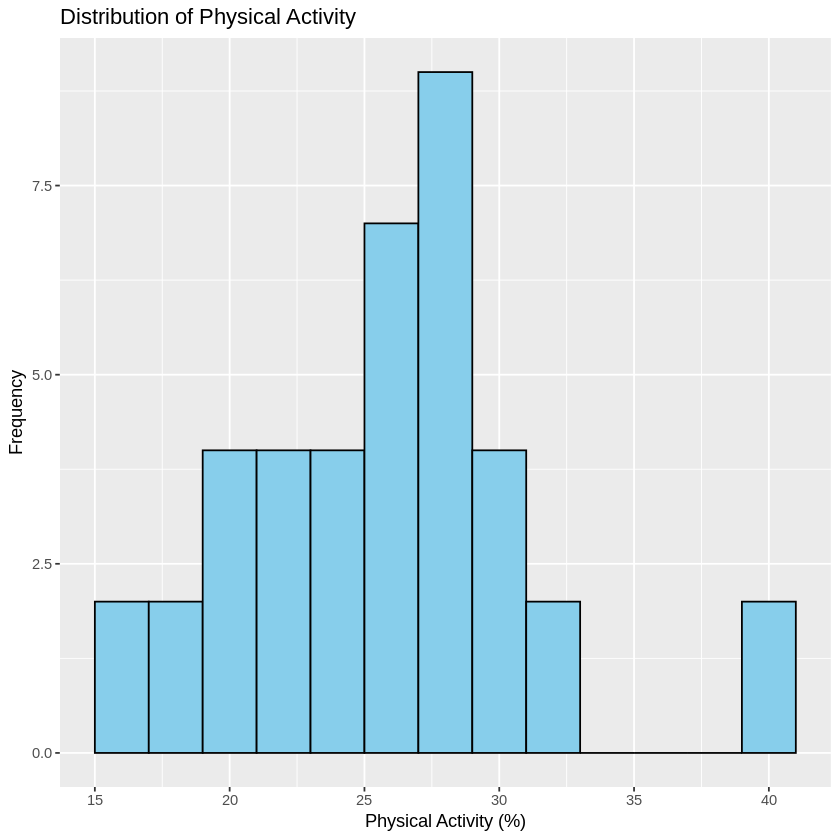

In [ ]:
# Histogram for Obesity Rates
ggplot(merged_df, aes(x = Obesity)) +
  geom_histogram(binwidth = 2, fill = "sky blue", color = "black") +
  labs(title = "Distribution of Obesity Rates", x = "Obesity Rate (%)", y = "Frequency")

# Histogram for Soda Consumption
ggplot(merged_df, aes(x = Soda)) +
  geom_histogram(binwidth = 2, fill = "sky blue", color = "black") +
  labs(title = "Distribution of Soda Consumption", x = "Soda Consumption (%)", y = "Frequency")

# Histogram for Physical Activity
ggplot(merged_df, aes(x = PhysicalActivity)) +
  geom_histogram(binwidth = 2, fill = "sky blue", color = "black") +
  labs(title = "Distribution of Physical Activity", x = "Physical Activity (%)", y = "Frequency")

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


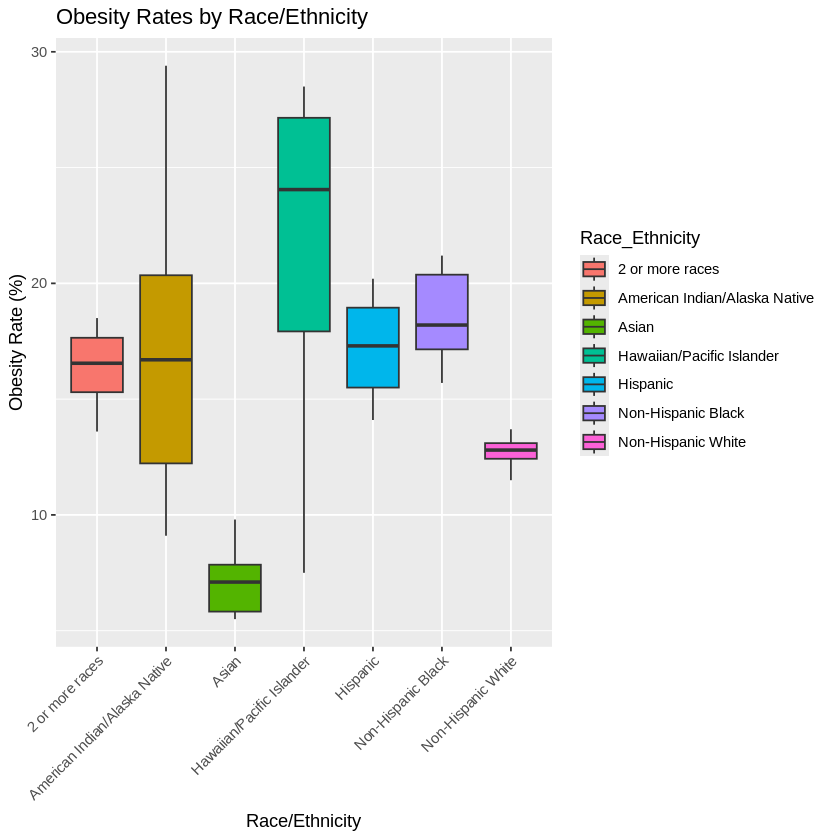

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


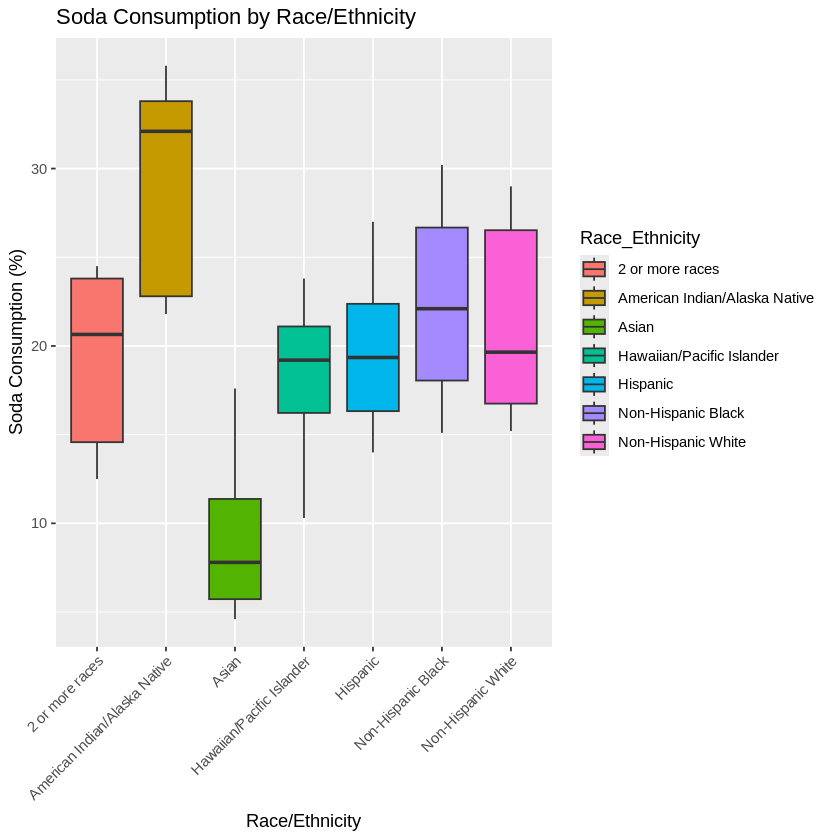

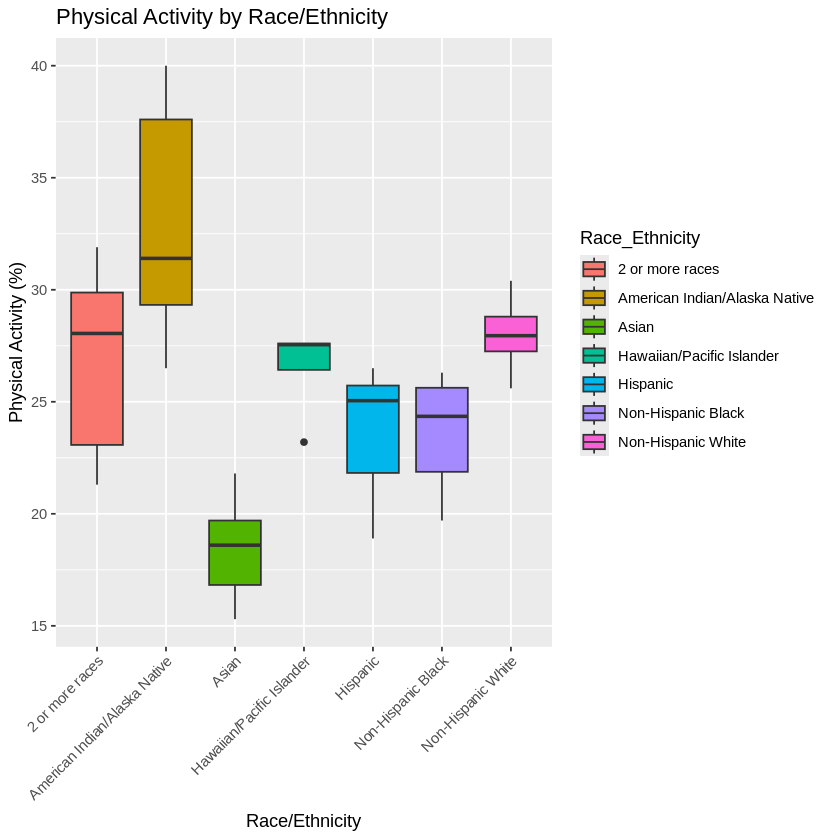

In [ ]:
# Box Plot for Obesity Rates by Race/Ethnicity
ggplot(merged_df, aes(x = Race_Ethnicity, y = Obesity, fill = Race_Ethnicity)) +
  geom_boxplot() +
  labs(title = "Obesity Rates by Race/Ethnicity", x = "Race/Ethnicity", y = "Obesity Rate (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Box Plot for Soda Consumption by Race/Ethnicity
ggplot(merged_df, aes(x = Race_Ethnicity, y = Soda, fill = Race_Ethnicity)) +
  geom_boxplot() +
  labs(title = "Soda Consumption by Race/Ethnicity", x = "Race/Ethnicity", y = "Soda Consumption (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Box Plot for Physical Activity by Race/Ethnicity
ggplot(merged_df, aes(x = Race_Ethnicity, y = PhysicalActivity, fill = Race_Ethnicity)) +
  geom_boxplot() +
  labs(title = "Physical Activity by Race/Ethnicity", x = "Race/Ethnicity", y = "Physical Activity (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


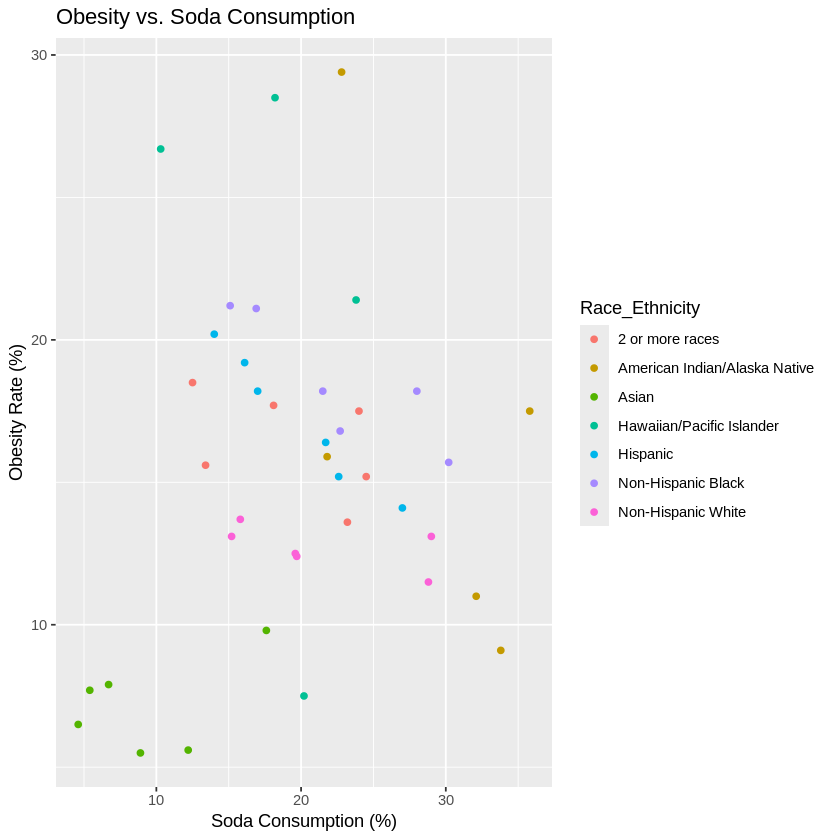

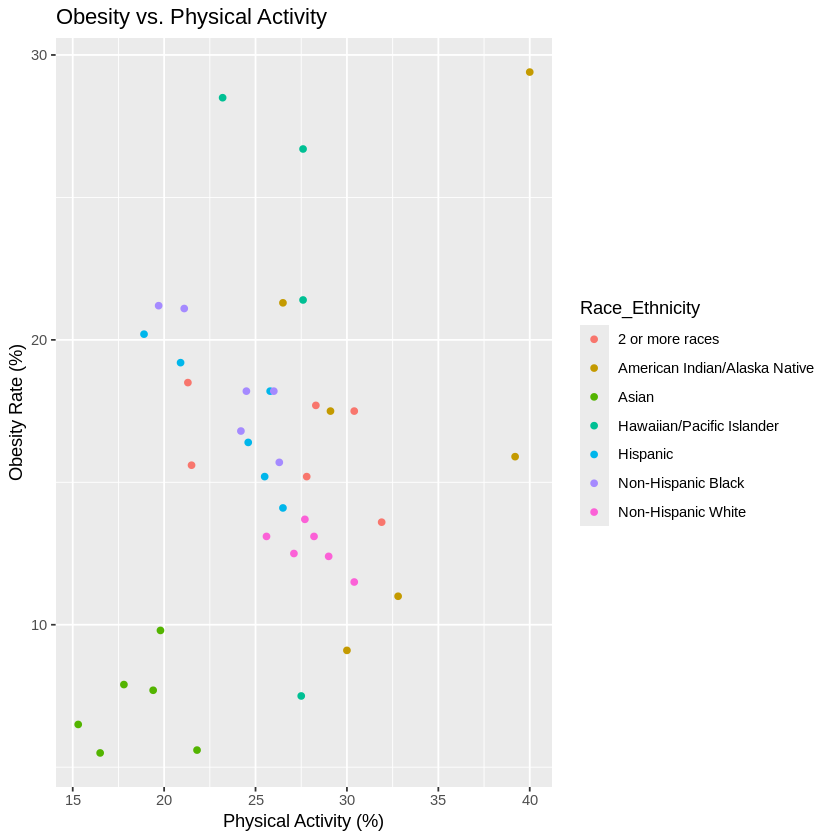

In [ ]:
# Scatter Plot for Obesity vs. Soda Consumption
ggplot(merged_df, aes(x = Soda, y = Obesity, color = Race_Ethnicity)) +
  geom_point() +
  labs(title = "Obesity vs. Soda Consumption", x = "Soda Consumption (%)", y = "Obesity Rate (%)")

# Scatter Plot for Obesity vs. Physical Activity
ggplot(merged_df, aes(x = PhysicalActivity, y = Obesity, color = Race_Ethnicity)) +
  geom_point() +
  labs(title = "Obesity vs. Physical Activity", x = "Physical Activity (%)", y = "Obesity Rate (%)")

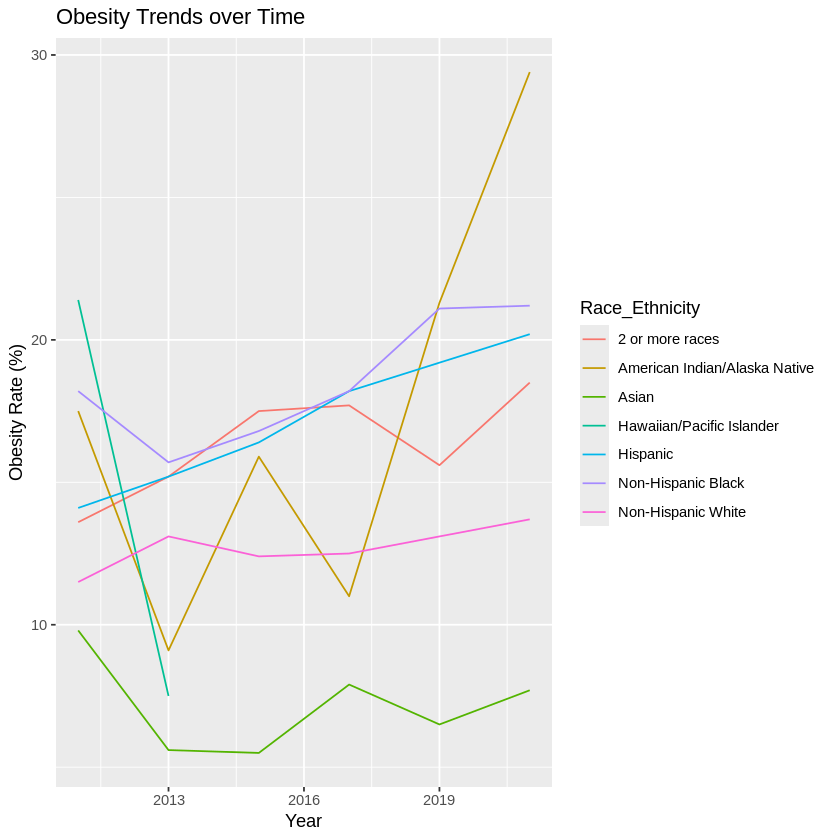

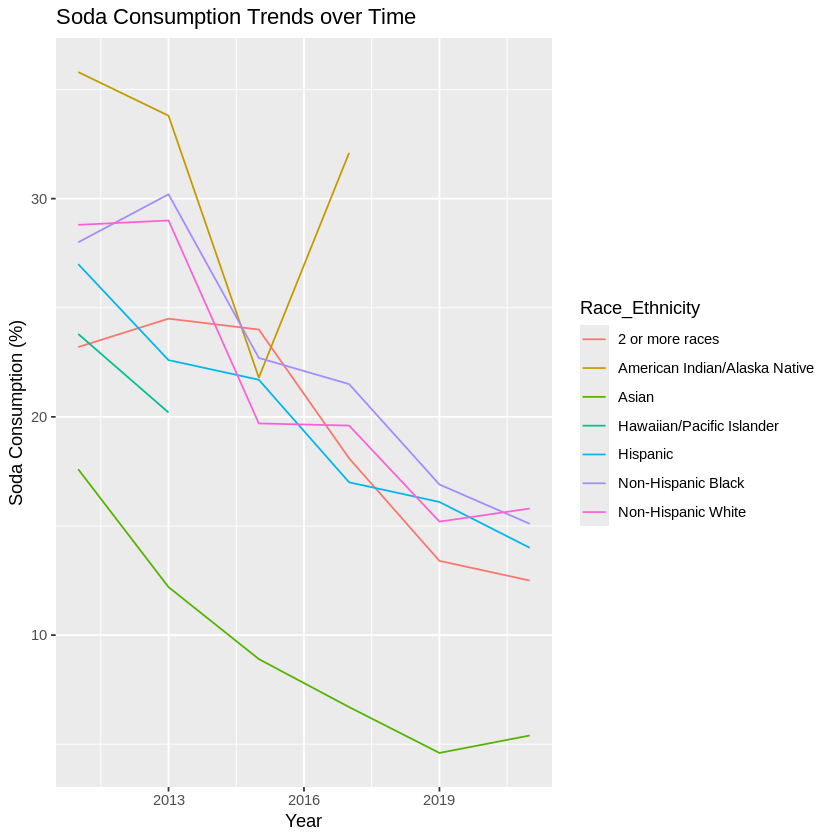

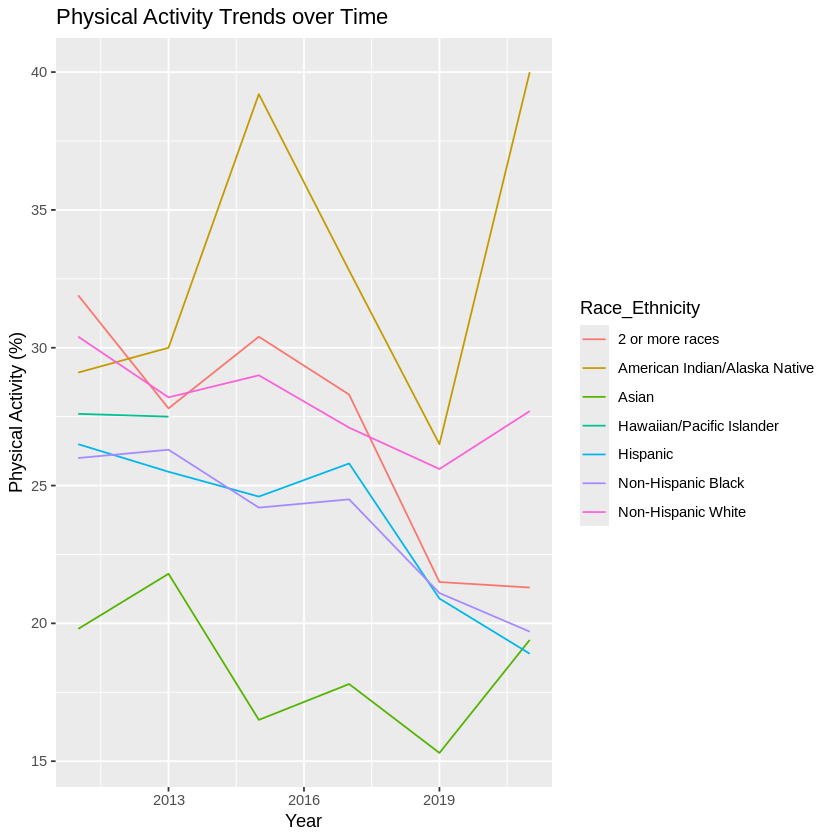

In [ ]:
# Line Plot for Obesity Trends over Time
ggplot(merged_df, aes(x = YearStart, y = Obesity, color = Race_Ethnicity)) +
  geom_line() +
  labs(title = "Obesity Trends over Time", x = "Year", y = "Obesity Rate (%)")

# Line Plot for Soda Consumption Trends over Time
ggplot(merged_df, aes(x = YearStart, y = Soda, color = Race_Ethnicity)) +
  geom_line() +
  labs(title = "Soda Consumption Trends over Time", x = "Year", y = "Soda Consumption (%)")

# Line Plot for Physical Activity Trends over Time
ggplot(merged_df, aes(x = YearStart, y = PhysicalActivity, color = Race_Ethnicity)) +
  geom_line() +
  labs(title = "Physical Activity Trends over Time", x = "Year", y = "Physical Activity (%)")

In [ ]:
install.packages(c("sjPlot", "ggplot2"))  # Install if not already installed
library(sjPlot)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




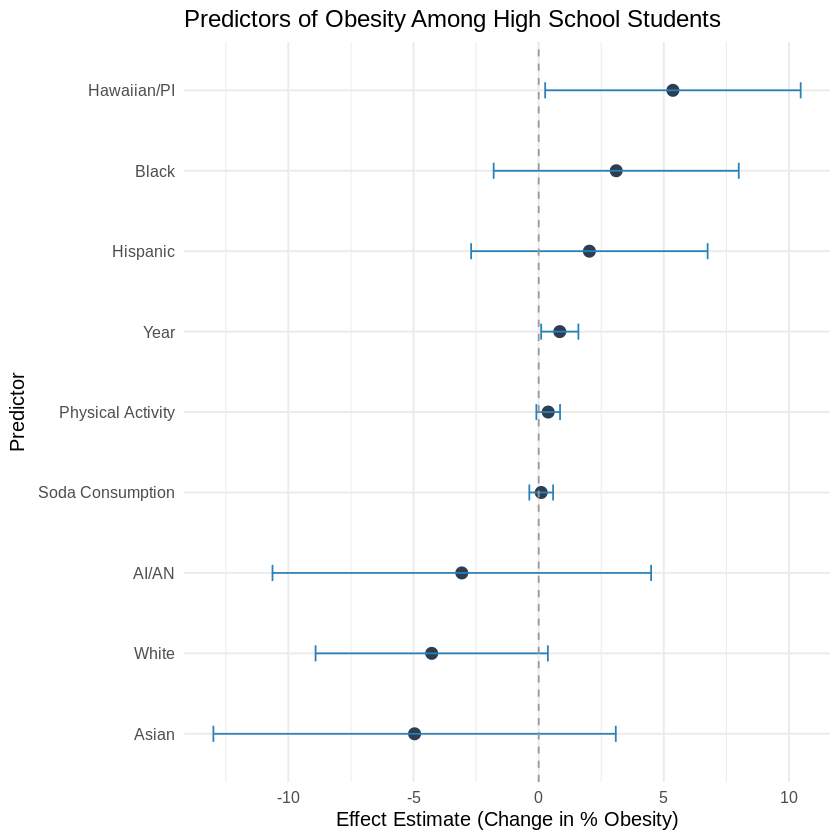

In [ ]:
library(broom)
library(dplyr)
library(ggplot2)

# Save regression
model <- lm(Obesity ~ Soda + PhysicalActivity + Race_Ethnicity + YearStart, data = merged_df)

# Get tidy model output with 95% CI
regression_results <- tidy(model, conf.int = TRUE)

# Clean term names using dplyr::recode
regression_results <- regression_results %>%
  mutate(term = dplyr::recode(term,
    `Race_EthnicityAmerican Indian/Alaska Native` = "AI/AN",
    `Race_EthnicityAsian` = "Asian",
    `Race_EthnicityHawaiian/Pacific Islander` = "Hawaiian/PI",
    `Race_EthnicityHispanic` = "Hispanic",
    `Race_EthnicityNon-Hispanic Black` = "Black",
    `Race_EthnicityNon-Hispanic White` = "White",
    `PhysicalActivity` = "Physical Activity",
    `Soda` = "Soda Consumption",
    `YearStart` = "Year",
    `(Intercept)` = "Intercept"
  ))

# Remove Intercept from plot
regression_results <- regression_results %>% filter(term != "Intercept")

# Forest plot
ggplot(regression_results, aes(x = estimate, y = reorder(term, estimate))) +
  geom_point(size = 3, color = "#2C3E50") +
  geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.2, color = "#2980B9") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray60") +
  labs(
    title = "Predictors of Obesity Among High School Students",
    x = "Effect Estimate (Change in % Obesity)",
    y = "Predictor"
  ) +
  theme_minimal(base_size = 12)

In [ ]:
regression_results <- regression_results %>%
  filter(term != "Intercept") %>%
  mutate(Significance = case_when(
    p.value < 0.001 ~ "*** p < 0.001",
    p.value < 0.01  ~ "** p < 0.01",
    p.value < 0.05  ~ "* p < 0.05",
    p.value < 0.1   ~ ". p < 0.1",
    TRUE            ~ "ns"
  ))


In [ ]:
scale_color_manual(values = c(
  "*** p < 0.001" = "#FF0000",    # Bright red
  "** p < 0.01"   = "#FF9900",    # Bright orange
  "* p < 0.05"    = "#33CC33",    # Bright green
  ". p < 0.1"     = "#00CCCC",    # Bright teal
  "ns"            = "#CCCCCC"     # Light gray
))


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    get_transformation: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: function
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: environment
    rescale: function
    reset: function
    train: function
    train_df: function
    transform: function
    transform_df: function
    super:  <ggproto object: Class ScaleDiscrete, Scale, gg>

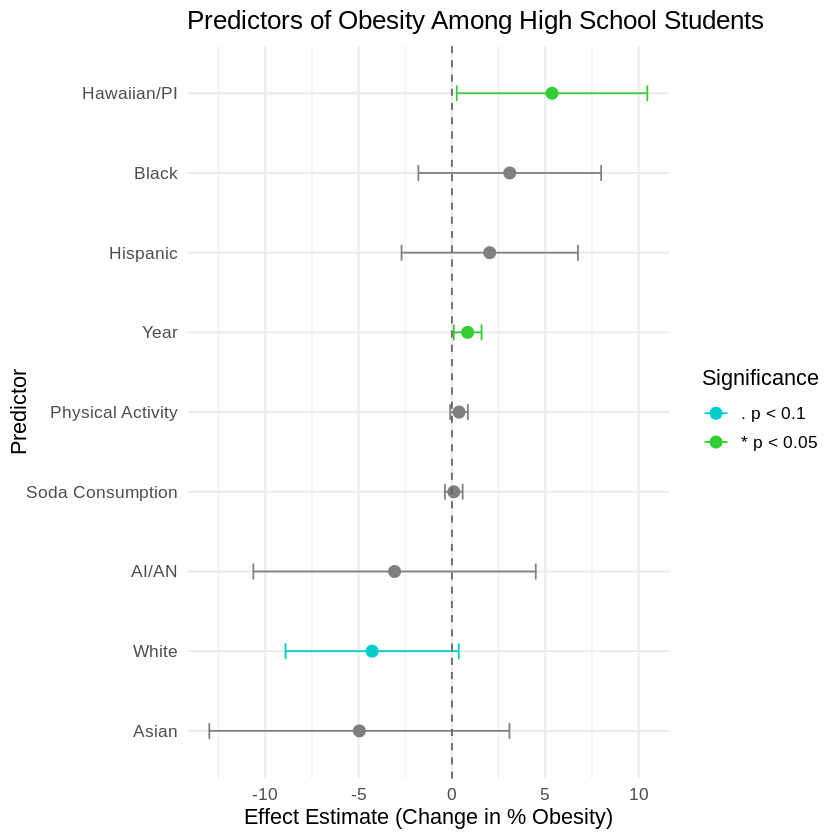

In [ ]:
ggplot(regression_results, aes(x = estimate, y = reorder(term, estimate), color = Significance)) +
  geom_point(size = 3) +
  geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.2) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray40") +
  labs(
    title = "Predictors of Obesity Among High School Students",
    x = "Effect Estimate (Change in % Obesity)",
    y = "Predictor",
    color = "Significance"
  ) +
  scale_color_manual(values = c(
    "*** p < 0.001" = "#FF0000",
    "** p < 0.01"   = "#FF9900",
    "* p < 0.05"    = "#33CC33",
    ". p < 0.1"     = "#00CCCC",
    "NS"            = "#CCCCCC"
  )) +
  theme_minimal(base_size = 13)


In [ ]:
# Ensure Race_Ethnicity is a factor
merged_df$Race_Ethnicity <- as.factor(merged_df$Race_Ethnicity)

# Run linear regression with interaction terms
interaction_model <- lm(Obesity ~ Soda * Race_Ethnicity +
                                   PhysicalActivity * Race_Ethnicity +
                                   YearStart,
                        data = merged_df)

# View the results
summary(interaction_model)



Call:
lm(formula = Obesity ~ Soda * Race_Ethnicity + PhysicalActivity * 
    Race_Ethnicity + YearStart, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7615 -0.7076  0.0232  0.8842  7.0286 

Coefficients:
                                                               Estimate
(Intercept)                                                  -411.18238
Soda                                                           -0.07597
Race_EthnicityAmerican Indian/Alaska Native                  -210.05143
Race_EthnicityAsian                                            -9.65525
Race_EthnicityHawaiian/Pacific Islander                        66.28345
Race_EthnicityHispanic                                          8.52318
Race_EthnicityNon-Hispanic Black                               14.07158
Race_EthnicityNon-Hispanic White                               -0.43832
PhysicalActivity                                                0.07052
YearStart                                      

In [ ]:
model_main <- lm(Obesity ~ Soda + PhysicalActivity + Race_Ethnicity + YearStart, data = merged_df)
summary(model_main)



Call:
lm(formula = Obesity ~ Soda + PhysicalActivity + Race_Ethnicity + 
    YearStart, data = merged_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0171  -0.9908  -0.0543   1.2529   6.5536 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                 -1695.6469   738.7712  -2.295
Soda                                            0.1012     0.2322   0.436
PhysicalActivity                                0.3804     0.2314   1.644
Race_EthnicityAmerican Indian/Alaska Native    -3.0714     3.6980  -0.831
Race_EthnicityAsian                            -4.9577     3.9301  -1.261
Race_EthnicityHawaiian/Pacific Islander         5.3629     2.4957   2.149
Race_EthnicityHispanic                          2.0257     2.3098   0.877
Race_EthnicityNon-Hispanic Black                3.0978     2.3937   1.294
Race_EthnicityNon-Hispanic White               -4.2737     2.2689  -1.884
YearStart                         

In [ ]:
confint(model_main)


,2.5 %,97.5 %
(Intercept),-3.206604e+03,-184.6901035
Soda,-3.736400e-01,0.5761313
PhysicalActivity,-9.289373e-02,0.8537042
Race_EthnicityAmerican Indian/Alaska Native,-1.063476e+01,4.4918849
Race_EthnicityAsian,-1.299577e+01,3.0803037
Race_EthnicityHawaiian/Pacific Islander,2.585217e-01,10.4671816
Race_EthnicityHispanic,-2.698444e+00,6.7498888
Race_EthnicityNon-Hispanic Black,-1.797997e+00,7.9935192
Race_EthnicityNon-Hispanic White,-8.914117e+00,0.3667169
YearStart,9.983015e-02,1.5865035


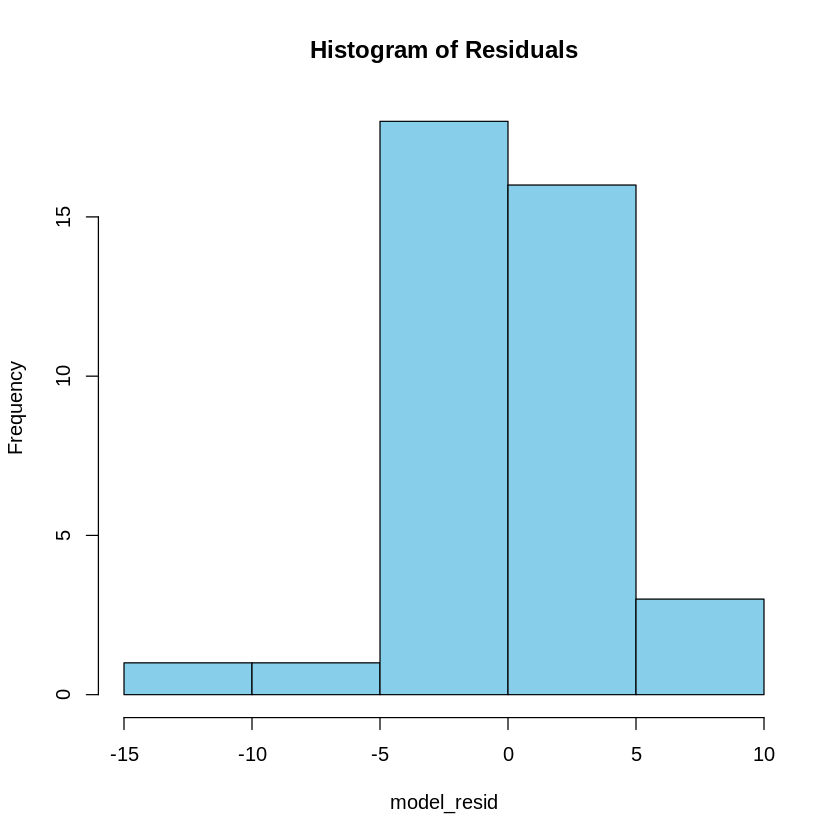

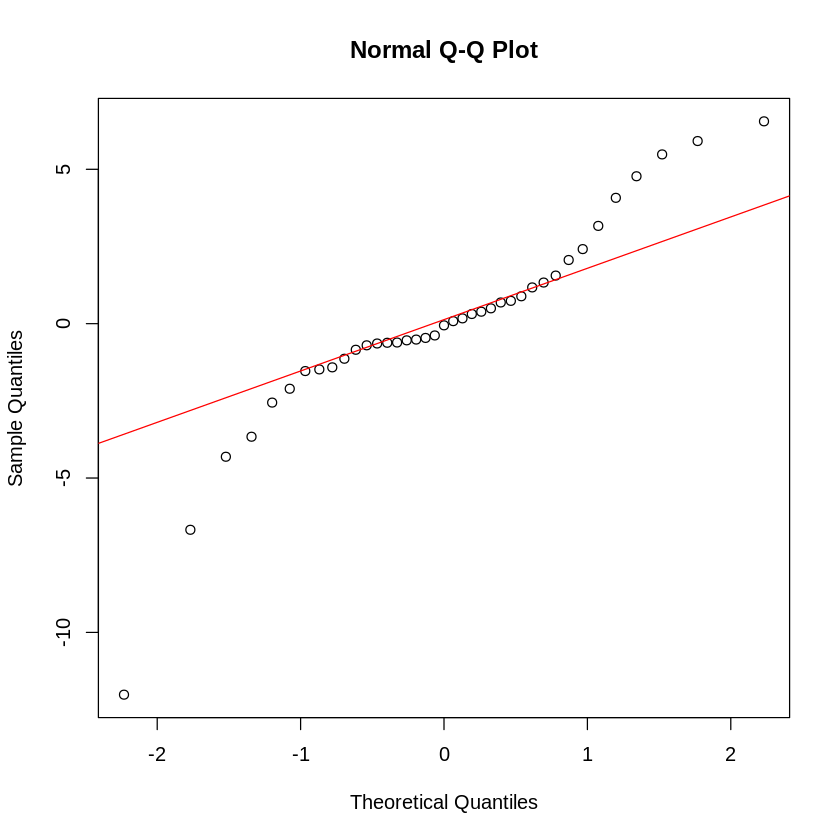

In [ ]:
# Extract residuals
model_resid <- residuals(model)

# Histogram
hist(model_resid, breaks = 5, col = "skyblue", main = "Histogram of Residuals")

# Q-Q plot
qqnorm(model_resid)
qqline(model_resid, col = "red")


In [ ]:
shapiro.test(model_resid)



	Shapiro-Wilk normality test

data:  model_resid
W = 0.90042, p-value = 0.002268


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


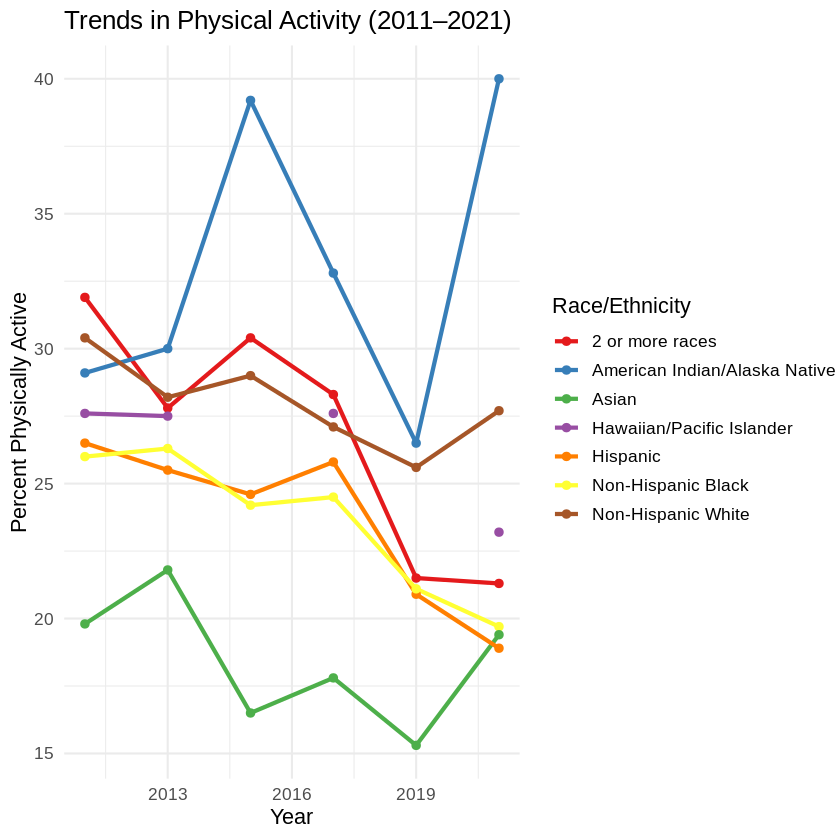

In [ ]:
library(ggplot2)

ggplot(merged_df, aes(x = YearStart, y = PhysicalActivity, color = Race_Ethnicity)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Trends in Physical Activity (2011–2021)",
    x = "Year",
    y = "Percent Physically Active",
    color = "Race/Ethnicity"
  ) +
  scale_color_brewer(palette = "Set1") +
  theme_minimal(base_size = 13)


In [ ]:
# Simple model
model_obesity_year <- lm(Obesity ~ YearStart, data = merged_df)
summary(model_obesity_year)



Call:
lm(formula = Obesity ~ YearStart, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.724  -3.728   1.357   2.210  11.050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1120.4255   508.4891  -2.203   0.0337 *
YearStart       0.5635     0.2522   2.234   0.0314 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.526 on 38 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.09282 
F-statistic:  4.99 on 1 and 38 DF,  p-value: 0.03145


In [ ]:
confint(model_obesity_year)


,2.5 %,97.5 %
(Intercept),-2.149808e+03,-91.04311
YearStart,5.285331e-02,1.07409


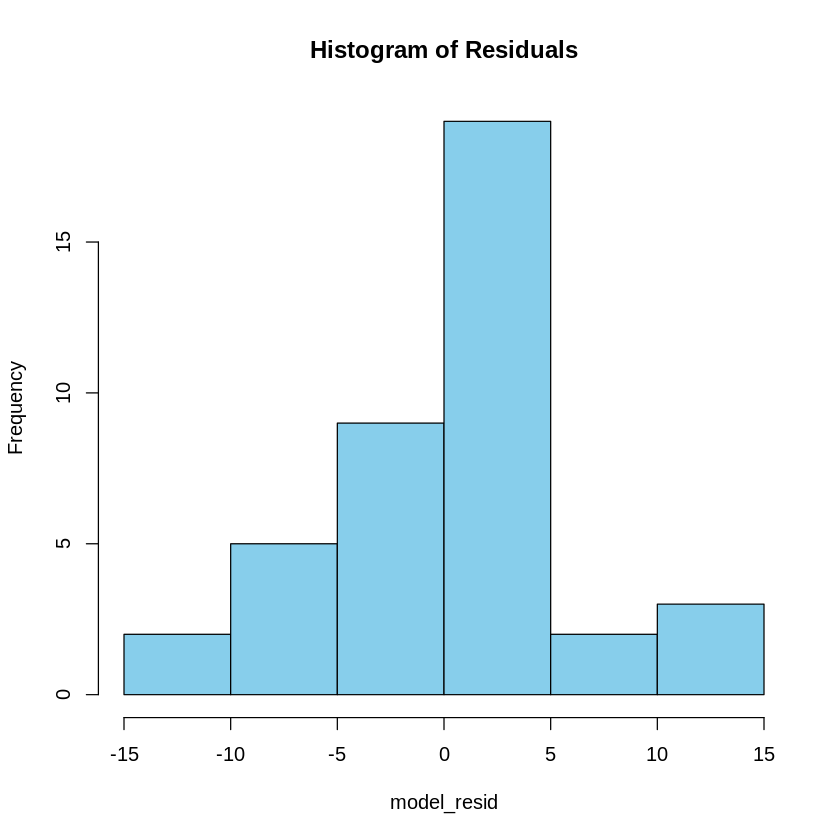

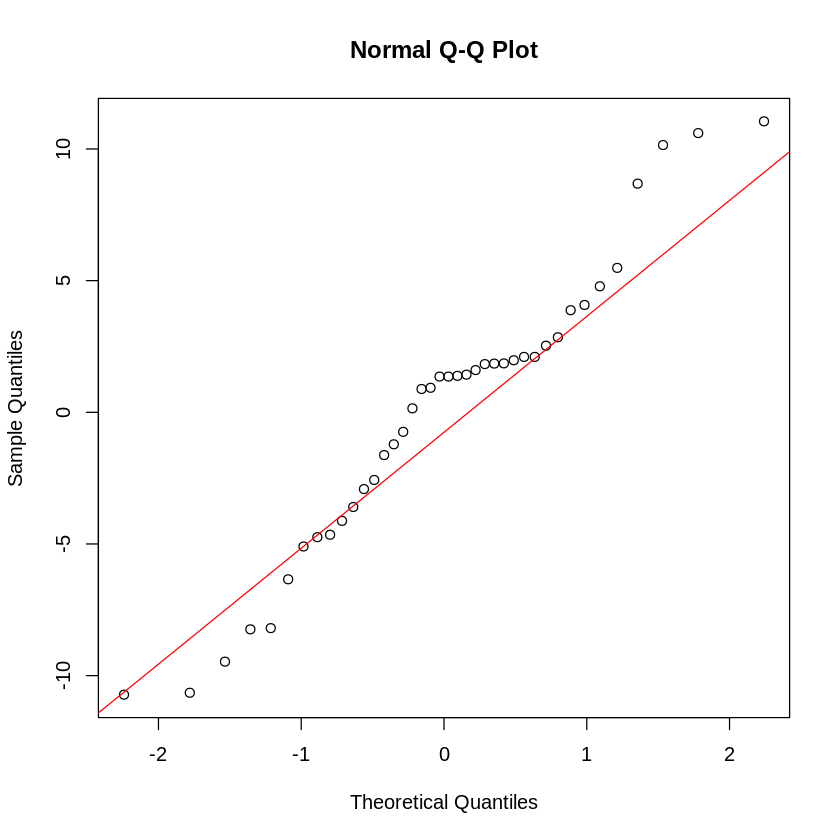

In [ ]:
# Extract residuals
model_resid <- residuals(model_obesity_year)

# Histogram
hist(model_resid, breaks = 5, col = "skyblue", main = "Histogram of Residuals")

# Q-Q plot
qqnorm(model_resid)
qqline(model_resid, col = "red")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


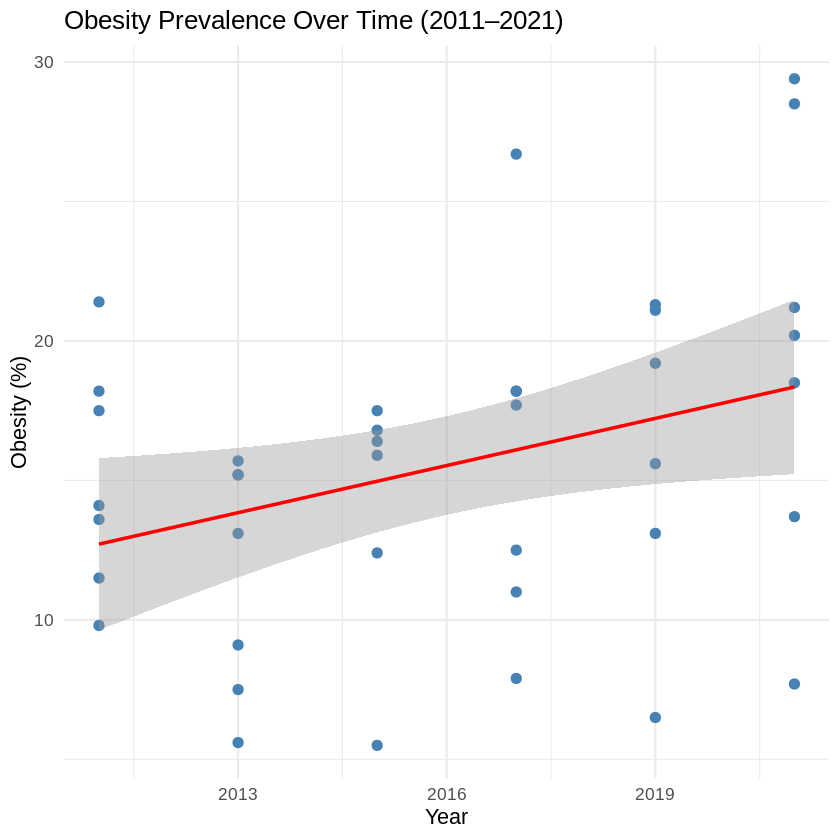

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Obesity)) +
  geom_point(color = "steelblue", size = 2.5) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(
    title = "Obesity Prevalence Over Time (2011–2021)",
    x = "Year",
    y = "Obesity (%)"
  ) +
  theme_minimal(base_size = 13)


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


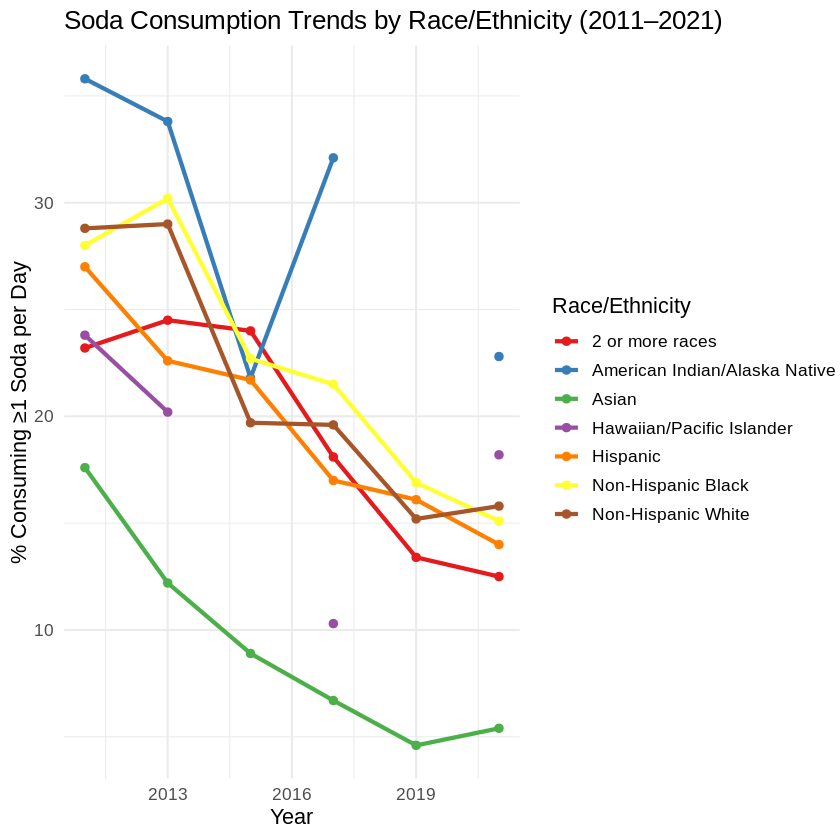

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = Soda, color = Race_Ethnicity)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Soda Consumption Trends by Race/Ethnicity (2011–2021)",
    x = "Year",
    y = "% Consuming ≥1 Soda per Day",
    color = "Race/Ethnicity"
  ) +
  scale_color_brewer(palette = "Set1") +
  theme_minimal(base_size = 13)


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


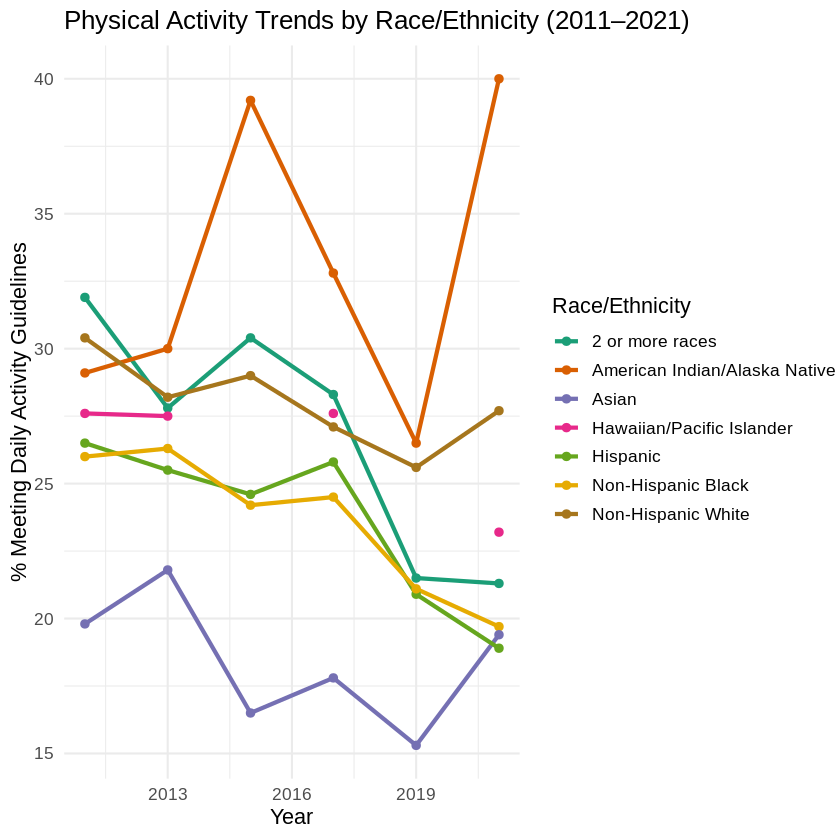

In [ ]:
ggplot(merged_df, aes(x = YearStart, y = PhysicalActivity, color = Race_Ethnicity)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Physical Activity Trends by Race/Ethnicity (2011–2021)",
    x = "Year",
    y = "% Meeting Daily Activity Guidelines",
    color = "Race/Ethnicity"
  ) +
  scale_color_brewer(palette = "Dark2") +
  theme_minimal(base_size = 13)


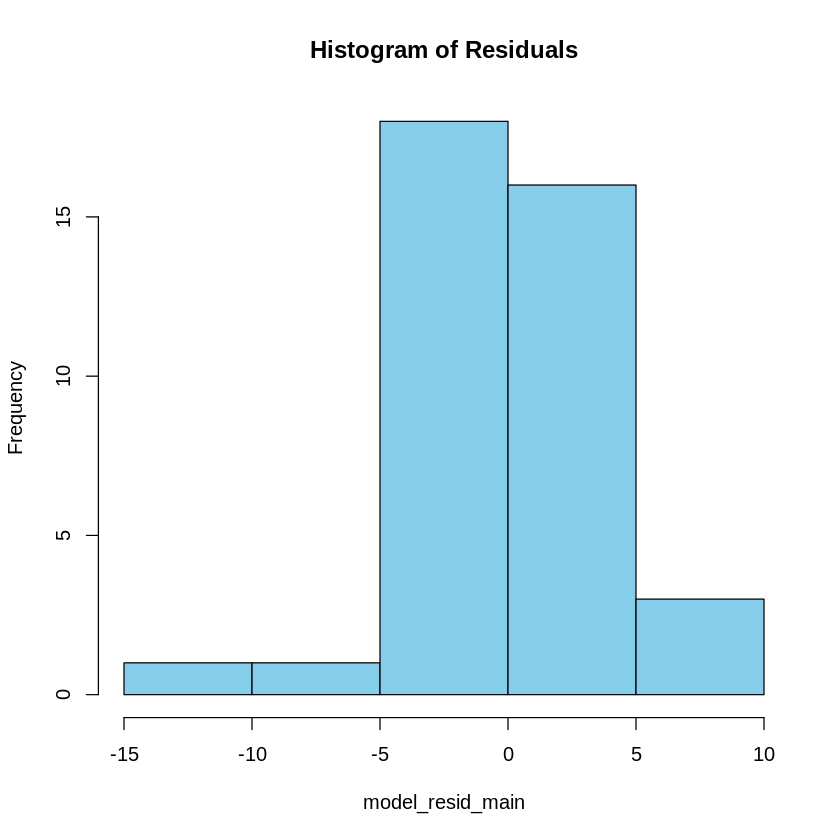

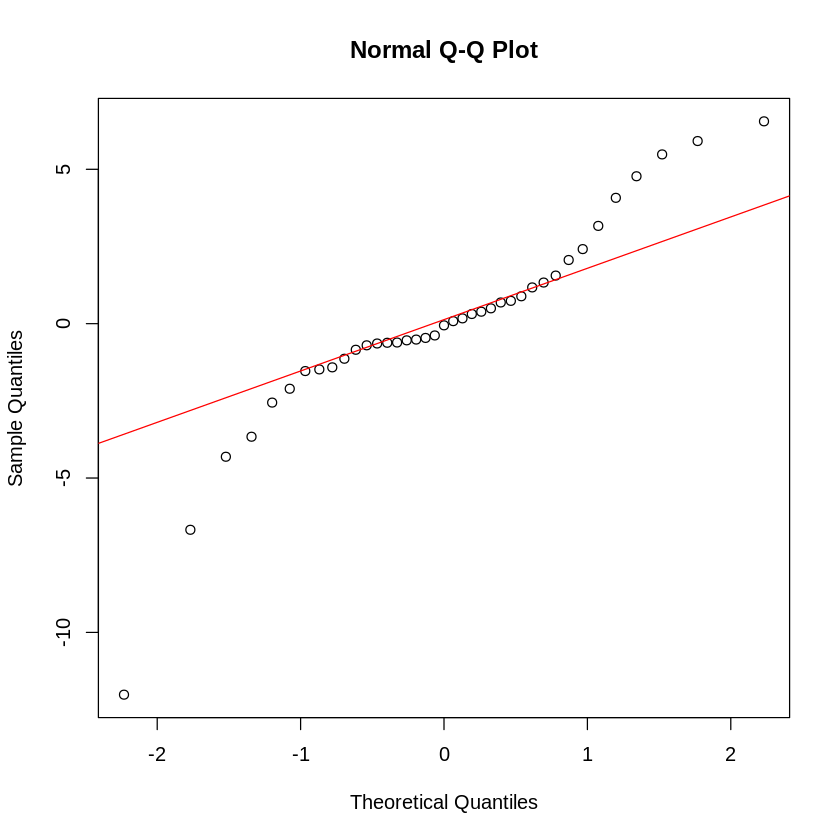

In [ ]:
# Extract residuals for main regression
model_resid_main <- residuals(model_main)

# Histogram
hist(model_resid_main, breaks = 5, col = "skyblue", main = "Histogram of Residuals")

# Q-Q plot
qqnorm(model_resid_main)
qqline(model_resid_main, col = "red")